In [16]:
# Set up
import numpy as np
import math
import random
import scipy

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

### Napisz program generujący zestaw dwuwymiarowych danych losowych złożony z K chmur punktów, taki że:

#### a) 
**każda chmura punktów składała się z N=1000 punktów o współrzędnych (x, y), gdzie** <br/>
**x pochodzi z rozkładu normalnego N(ai, 1),** <br/>
**y pochodzi z rozkładu normalnego N(bi, 1),** <br/>
**zaś (ai, bi) to centrum itej chmury punktów, wektor V zawiera pary (ai, bi)**

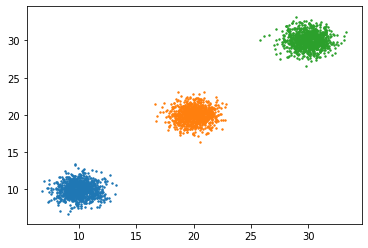

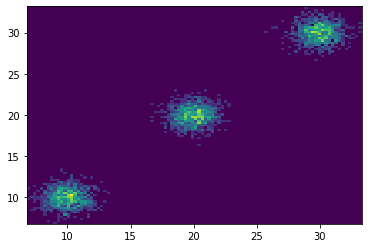

In [90]:
def generate(K, N, V):
    assert(K == len(V))
    
    def cloud(a, b, N):
        mean = (a, b)
        cov = np.array([[1, 0], [0, 1]])
        X, Y = np.random.multivariate_normal(mean, cov, N).T
        return np.array([X, Y])
        
    return np.array([cloud(a, b, N) for (a,b) in V])

N = 1000
V = [ [10, 10], [20, 20], [30, 30] ]
clouds = generate(3, N, V)

P1, P2 = plt.figure().gca(), plt.figure().gca()
for c in clouds:
    P1.scatter(c[0], c[1], s = 2)

P2 = plt.hist2d(clouds[:, 0, :].reshape(N * 3), clouds[:, 1, :].reshape(N * 3), bins=100, density=True, norm=mcolors.PowerNorm(0.7), cmap=cm.viridis)  

#### b) 
**Centra chmur punktów (ai, bi) tworzą wielokąt foremny o boku o zadanej długości d.<br/>**
**Uruchom program dla K = 7, K = 11 i K = 23 oraz d = 5, d = 10 i d = 15.<br/>**
**Zrób rysunki przedstawiające wyniki.<br/>**


In [103]:
def pol_vertices(K, d):
    R = d / (2 * math.sin(math.pi / K))
    return np.array([[R * math.sin(a), R * math.cos(a)] for a in np.arange(0, 2 * math.pi, 2 * math.pi / K)])

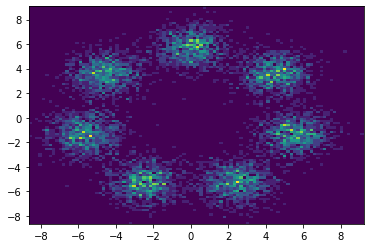

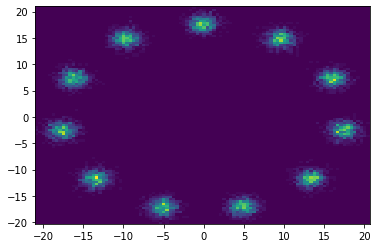

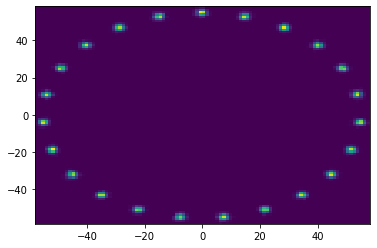

In [123]:
K1, K2, K3 = 7, 11 ,23
d1, d2, d3 = 5, 10, 15

V1 = pol_vertices(K1, d1)
V2 = pol_vertices(K2, d2)
V3 = pol_vertices(K3, d3)


C1 = generate(K1, N, V1)
C2 = generate(K2, N, V2)
C3 = generate(K3, N, V3)

P1, P2, P3 = plt.figure().gca(), plt.figure().gca(), plt.figure().gca()
count, xedges, yedges, img_mesh = P1.hist2d(C1[:, 0, :].reshape(N * K1), C1[:, 1, :].reshape(N * K1), bins=100, density=True, norm=mcolors.PowerNorm(1), cmap=cm.viridis) 
count, xedges, yedges, img_mesh = P2.hist2d(C2[:, 0, :].reshape(N * K2), C2[:, 1, :].reshape(N * K2), bins=100, density=True, norm=mcolors.PowerNorm(1), cmap=cm.viridis)  
count, xedges, yedges, img_mesh = P3.hist2d(C3[:, 0, :].reshape(N * K3), C3[:, 1, :].reshape(N * K3), bins=100, density=True, norm=mcolors.PowerNorm(1), cmap=cm.viridis)  